# **Praktikum 1**
------------------------------------
### Langkah 1

#### Klasifikasi SVM dengan Data Dummy

In [1]:
# import library
import numpy as np  # Mengimpor library NumPy dengan alias np
import matplotlib.pyplot as plt  # Mengimpor modul pyplot dari Matplotlib dengan alias plt
from scipy import stats  # Mengimpor modul stats dari library SciPy
import seaborn as sns  # Mengimpor library Seaborn dengan alias sns

Pada kegiatan ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

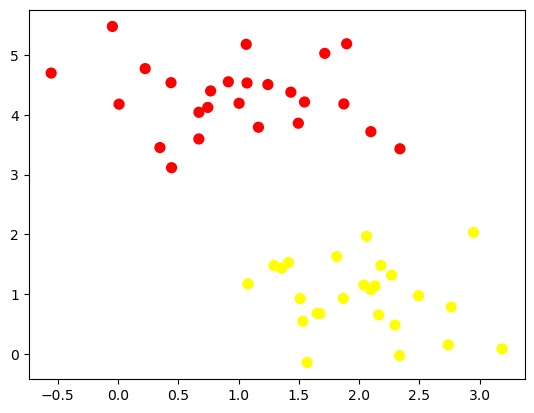

In [2]:
from sklearn.datasets import make_blobs  # Mengimpor fungsi make_blobs dari modul sklearn.datasets

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
# - Membuat data sintetis dengan 50 sampel, 2 pusat (centers),
#   seed random (random_state) 0, dan standar deviasi cluster 0.60
# - X: Variabel fitur (features)
# - y: Variabel target (labels)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# - plt.scatter(): Membuat plot scatter untuk memvisualisasikan data
# - X[:, 0], X[:, 1]: Memilih fitur untuk sumbu x dan y dari plot
# - c=y: Memberikan warna pada titik berdasarkan label target (y)
# - s=50: Menentukan ukuran marker menjadi 50
# - cmap='autumn': Memilih peta warna 'autumn' untuk membedakan kelas


Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

(-1.0, 3.5)

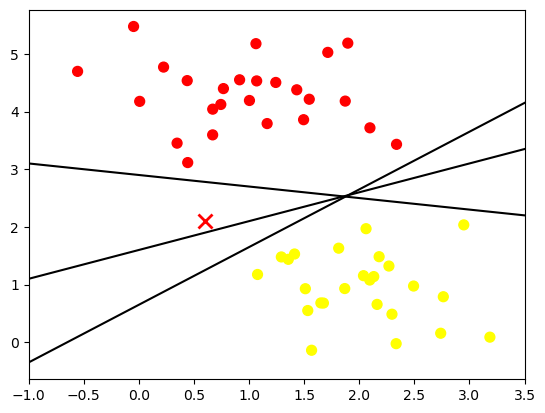

In [3]:
xfit = np.linspace(-1, 3.5)  # Membuat array titik-titik xfit dari -1 hingga 3.5

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Membuat scatter plot dari data X, dengan warna tergantung pada nilai y

plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)  # Menandai titik (0.6, 2.1) sebagai 'x' berwarna merah

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:  # Iterasi dalam loop untuk setiap pasangan nilai (m, b)
    plt.plot(xfit, m * xfit + b, '-k')  # Plot garis dengan formula m * xfit + b, dengan warna hitam ('-k')

plt.xlim(-1, 3.5)  # Menetapkan batas sumbu x pada rentang -1 hingga 3.5

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.
Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

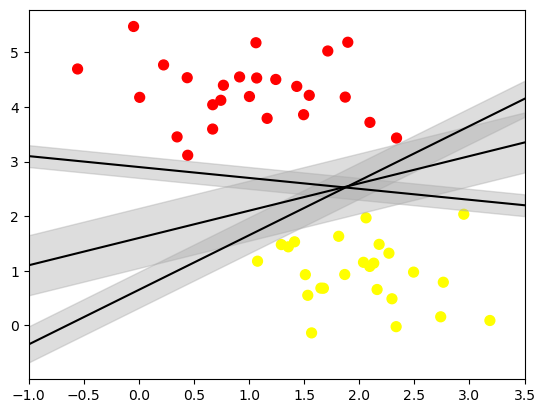

In [4]:
xfit = np.linspace(-1, 3.5)  # Membuat array titik-titik xfit dari -1 hingga 3.5
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Membuat scatter plot dari data X, dengan warna tergantung pada nilai y

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:  # Iterasi dalam loop untuk setiap set parameter (m, b, d)
    yfit = m * xfit + b  # Menghitung nilai yfit dengan formula m * xfit + b
    plt.plot(xfit, yfit, '-k')  # Plot garis berdasarkan nilai xfit dan yfit, dengan warna hitam ('-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)  # Mengisi area antara garis dengan lebar d

plt.xlim(-1, 3.5)  # Menetapkan batas sumbu x pada rentang -1 hingga 3.5

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

### Penerappan fitting SVM

In [5]:
from sklearn.svm import SVC  # Mengimpor Support Vector Classifier dari modul SVM (Mesin Vektor Pendukung)

model = SVC(kernel='linear', C=1E10)  # Membuat model Support Vector Classifier dengan kernel linear dan parameter C yang besar
model.fit(X, y)  # Melatih model SVC dengan data X sebagai fitur dan y sebagai target

SVC(C=10000000000.0, kernel='linear')

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [6]:
# buat sebuah fungsi untuk menampilkan fitting data
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()  # Ambil objek axes saat ini jika tidak ada yang disediakan
    
    xlim = ax.get_xlim()  # Dapatkan batas sumbu x
    ylim = ax.get_ylim()  # Dapatkan batas sumbu y
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)  # Buat array x dari nilai terkecil hingga terbesar dalam rentang x
    y = np.linspace(ylim[0], ylim[1], 30)  # Buat array y dari nilai terkecil hingga terbesar dalam rentang y
    Y, X = np.meshgrid(y, x)  # Buat grid Y, X dari array y, x
    xy = np.vstack([X.ravel(), Y.ravel()]).T  # Bentuk ulang array X, Y ke dalam format vektor
    P = model.decision_function(xy).reshape(X.shape)  # Hitung fungsi keputusan model untuk setiap titik pada grid
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # Gambar kontur plot dengan warna hitam, tingkat nilai [-1, 0, 1], transparansi 0.5, dan jenis garis [--', '-', '--']
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')
    # Gambar titik support vectors pada grafik
    ax.set_xlim(xlim)  # Atur batas sumbu x sesuai dengan yang sebelumnya didapatkan
    ax.set_ylim(ylim)  # Atur batas sumbu y sesuai dengan yang sebelumnya didapatkan

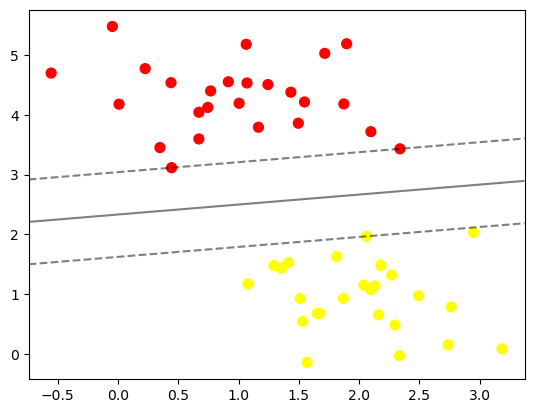

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model) #  Fungsi tersebut bertujuan untuk menampilkan visualisasi dari fitting data menggunakan model Support Vector Classifier (SVC) model.

beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [8]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

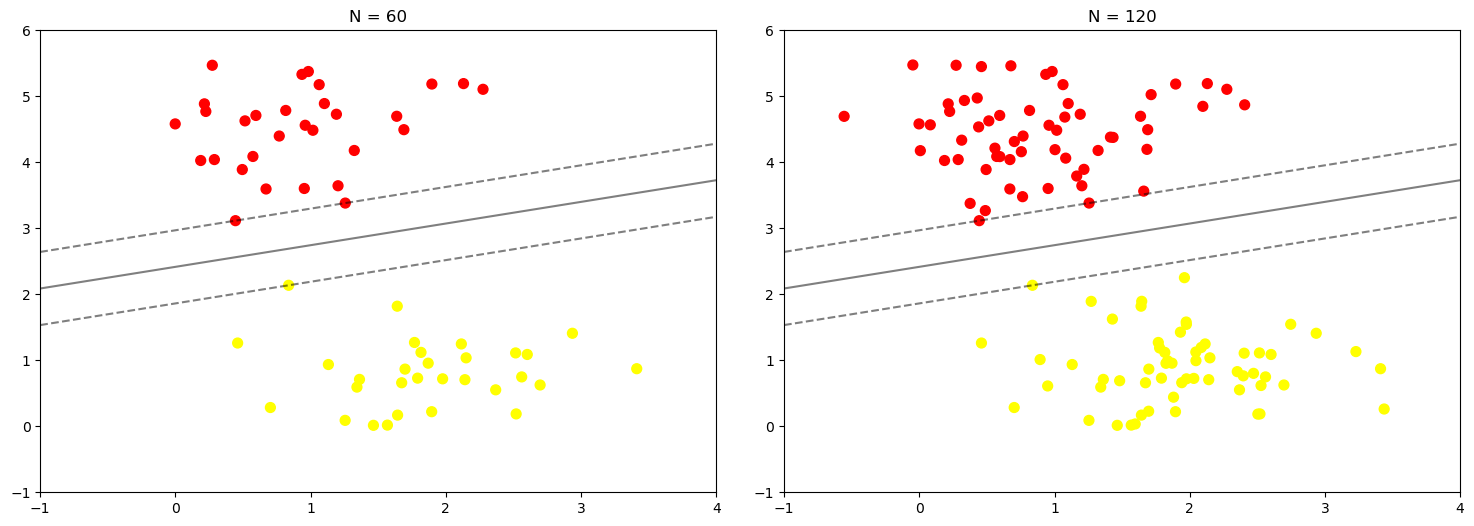

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]  # Mengambil sejumlah N data pertama
    y = y[:N]  # Mengambil sejumlah N label pertama
    model = SVC(kernel='linear', C=1E10)  # Membuat model SVC dengan kernel linear dan parameter C yang besar
    model.fit(X, y)  # Melatih model dengan data X dan label y

    ax = ax or plt.gca()  # Mendapatkan objek axes dari input atau membuat objek baru jika tidak tersedia
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Membuat scatter plot dari data X dan label y
    ax.set_xlim(-1, 4)  # Mengatur batas sumbu x pada rentang -1 hingga 4
    ax.set_ylim(-1, 6)  # Mengatur batas sumbu y pada rentang -1 hingga 6
    plot_svc_decision_function(model, ax)  # Memanggil fungsi untuk menampilkan fitting data dengan model SVC

fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # Membuat subplots dengan 1 baris, 2 kolom, ukuran gambar 16x6
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)  # Menyesuaikan letak subplot dan ruang di antara mereka
for axi, N in zip(ax, [60, 120]):  # Looping pada setiap axes dan N (jumlah sampel)
    plot_svm(N, axi)  # Memanggil fungsi plot_svm dengan jumlah sampel N dan axes yang sesuai
    axi.set_title('N = {0}'.format(N))  # Menetapkan judul pada setiap subplot berdasarkan jumlah sampel N


##### Data Tidak Terpisah Secara Linier

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

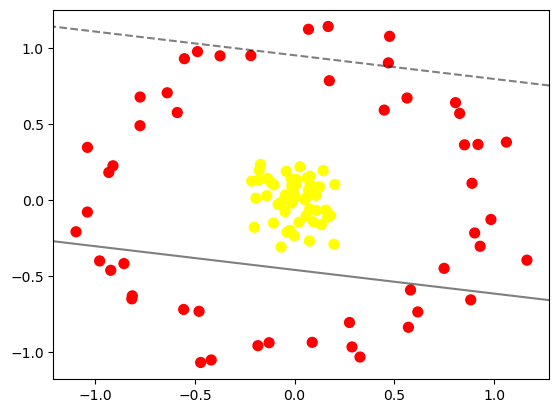

In [10]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles  # Mengimpor fungsi make_circles dari modul sklearn.datasets
X, y = make_circles(100, factor=.1, noise=.1)  # Membuat data sirkular dengan 100 sampel, faktor .1, dan noise .1

clf = SVC(kernel='linear').fit(X, y)  # Membuat model SVC dengan kernel linear dan melatihnya dengan data X, y

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # Membuat scatter plot dari data X, dengan warna tergantung pada nilai y
plot_svc_decision_function(clf, plot_support=False)  # Memanggil fungsi plot_svc_decision_function tanpa menampilkan support vectors

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

In [11]:
r = np.exp(-(X ** 2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

In [12]:
from mpl_toolkits.mplot3d import Axes3D  # Mengimpor modul Axes3D dari mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed

# Proses pengambilan data atau perhitungan variabel r
X, y = make_circles(100, factor=.1, noise=.1)
r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y, r=r):
    # Membuat subplot 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Membuat scatter plot 3D dengan sumbu x, y, z, dan menggunakan warna tergantung pada nilai y
    ax.scatter(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    # Menetapkan sudut pandang elevasi dan azimut
    ax.view_init(elev=elev, azim=azim)
    # Menetapkan label sumbu x, y, z
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()

# Membuat interaksi plot 3D dengan memungkinkan pengguna mengubah elevasi dan azimut
interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180), X=fixed(X), y=fixed(y), r=fixed(r))


interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.9913369 ,  0.2115993 ],
       [ 0.57222132, -0.884774  ],
       [-0.68174035, -0.26205792],
       [ 0.95236091,  0.02551801],
       [ 0.11452888,  0.04248927],
       [ 0.03133821, -0.10584965],
       [ 0.07331541,  0.10676785],
       [ 0.05605645,  0.00597352],
       [ 0.57252311, -0.67722806],
       [ 0.13577639, -0.90442149],
       [-1.00159004,  0.12698951],
       [-0.22034628, -0.10690728],
       [ 1.02241525, -0.27278403],
       [ 0.03800039, -0.06326221],
       [-0.51143009,  0.78241703],
       [-0.05138593, -0.03716385],
       [ 0.07399675, -0.13394055],
       [-0.09272461,  0.15370742],
       [-0.29374182,  0.02362156],
       [ 0.09422525, -0.07324633],
       [ 0.79134356, -0.58955832],
       [-0.09599147,  0.1700416 ],
       [ 0.01116454,  0.99356426],
       [-0.74187696,  0.92515916],
       [ 0.46672516,  0.98114077],
       [-0.86483529, -0.02213781],
       [ 0.29943168,  1.00823724],
       [

walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [13]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

# membuat sebuah model Support Vector Classifier (SVC) dengan menggunakan kernel radial basis function ('rbf') yang digunakan untuk mengatasi masalah yang tidak dapat dipisahkan secara linier

SVC(C=1000000.0)

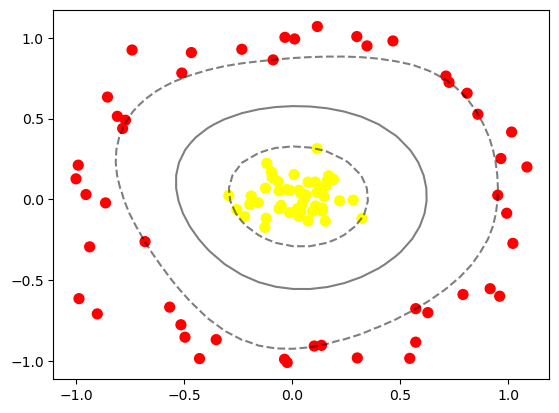

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
#Menampilkan scatter plot dari data X dimana sumbu x diwakili oleh X[:, 0], sumbu y diwakili oleh X[:, 1]. Setiap titik pada scatter plot diwarnai berdasarkan nilai y. Ukuran setiap titik adalah 50 dan menggunakan skema warna 'autumn'.

plot_svc_decision_function(clf)
# Memanggil fungsi plot_svc_decision_function untuk menampilkan batas keputusan dari model Support Vector Classifier (clf) pada scatter plot sebelumnya

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')
#Menambahkan titik-titik yang merupakan support vectors dari model SVM (clf) ke dalam scatter plot yang sudah ada sebelumnya

### Data Overlap

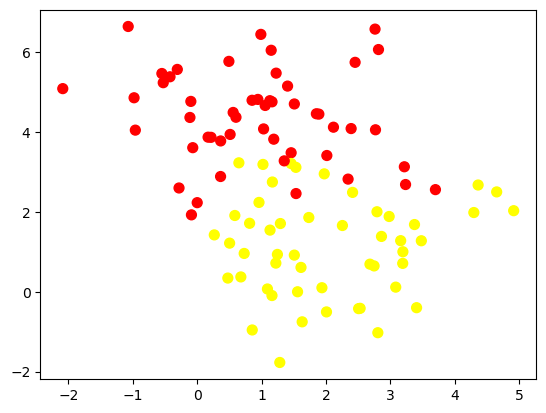

In [15]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
# Membuat dataset menggunakan make_blobs dengan 100 sampel, 2 pusat (centers=2), seed generator acak (random_state=0), dan standar deviasi cluster sebesar 1.2 (cluster_std=1.2). Variabel X berisi fitur-fitur, sedangkan y adalah labelnya.

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
#Menampilkan scatter plot dari data X dimana sumbu x diwakili oleh X[:, 0] dan sumbu y diwakili oleh X[:, 1]. Setiap titik pada scatter plot diwarnai berdasarkan nilai y. Ukuran setiap titik adalah 50 dan menggunakan skema warna 'autumn'.

untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

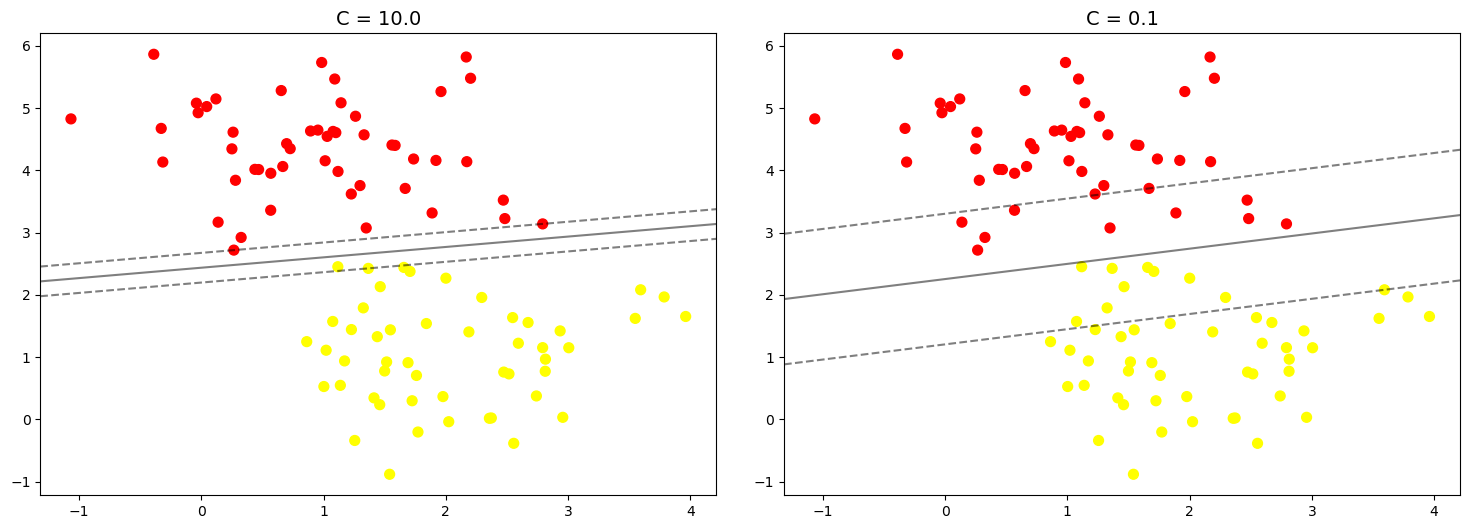

In [16]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
# Membuat dataset dengan 100 sampel, 2 pusat (centers=2), seed generator acak (random_state=0), dan standar deviasi cluster sebesar 0.8 (cluster_std=0.8). 

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Kode tersebut menghasilkan dua subplot yang menunjukkan perbedaan dalam pembuatan batas keputusan SVM menggunakan kernel linier untuk nilai C yang berbeda.
# Subplot pertama memiliki nilai C = 10.0 dan subplot kedua memiliki nilai C = 0.1. Di setiap subplot, data ditampilkan, garis batas keputusan SVM digambarkan, serta support vectors ditampilkan.

Perlu diperhatikan bahwa nila optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa)